Before you begin, execute this cell to import numpy and packages from the D-Wave Ocean suite, and all necessary functions for the gate-model framework you are going to use, whether that is the Forest SDK or Qiskit. In the case of Forest SDK, it also starts the qvm and quilc servers.

In [3]:
%run -i "assignment_helper.py"
%matplotlib inline

Available frameworks:
Qiskit
D-Wave Ocean


# Measurements

**Exercise 1** (1 point). Measurements in the quantum computers we can access today always measure in the computational basis. This means that either the projection $|0\rangle\langle 0|$ or the $|1\rangle\langle 1|$ is applied on the qubit we are measuring, corresponding to the outcome 0 or 1. The Born rule tells us that we get either of these with the probability of the absolute value of the probability amplitude squared. The qubit afterwards is $|0\rangle$ or $|1\rangle$, respectively.

First, create a circuit in your preferred framework with two classical registers (and one quantum register if you're using Qiskit). The object should be called `circuit`.

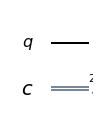

In [12]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1,2)

circuit.draw(output='mpl')

In [5]:
classical_bits = get_classical_bits(circuit)
assert classical_bits == 2

**Exercise 2** (1 point). Next, extend the circuit with a Hadamard gate and a measurement on the qubit. Write the measurement result in the first classical register. You will get a probabilistic outcome of 0 or 1.

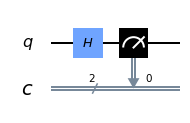

In [13]:
circuit.h(0) # hardaman gate
circuit.measure([0], [0])

circuit.draw(output='mpl')

In [14]:
counts = get_single_measurement_counts(circuit)
assert abs(counts['00']/100-.5) < 0.1

**Exercise 3** (1 point). To see that the quantum state collapses to the basis state indicated by the outcome, apply a second measurement on the same circuit, but write the result in the second register. Executing the program should always give the same outcome in the two subsequent measurements.

In [19]:
circuit.measure([0], [1])

circuit.draw(output='mpl')

counts = get_counts(circuit)

print(counts)


{'11': 48, '00': 52}


In [17]:
counts = get_counts(circuit)
assert abs(counts['00']/100-.5) < 0.1
assert abs(counts['11']/100-.5) < 0.1
assert sum(counts.values()) == 100

# Measuring multiqubit systems

**Exercise 4** (1 point). We typically work with local measurements, meaning that the qubits are measured separately. Create a two-qubit circuit with measurements included that reproduces the uniform distribution on four outcomes.

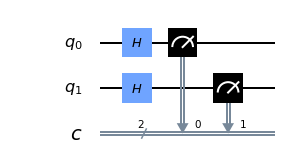

In [27]:
from qiskit.visualization import plot_histogram
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.h(1)
circuit.measure([0,1], [0, 1])
circuit.draw(output='mpl')

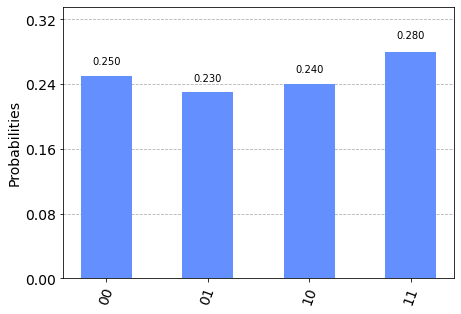

In [31]:
# nice plot of the counts
counts = get_counts(circuit)
plot_histogram(counts)

In [32]:
counts = get_counts(circuit)
assert abs(counts['00']/100-.25) < 0.1
assert abs(counts['01']/100-.25) < 0.1
assert abs(counts['11']/100-.25) < 0.1
assert sum(counts.values()) == 100

**Exercise 5** (1 point). This is a typical product state, showing no correlation between the qubits. In contrast, if you make simultaneous measurements on an entangled state, for instance the $|\phi^+\rangle$ or the $|\phi^-\rangle$ state, the measurement outcomes will be correlated. Create either of these states and measure both qubits.

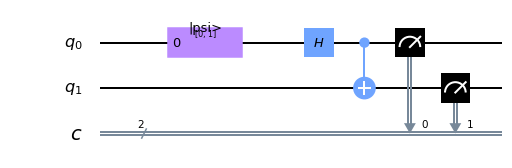

In [33]:
circuit = QuantumCircuit(2,2)
circuit.initialize([0,1], 0) # Initialise to the 0th qubit to |1>
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0, 1])
circuit.draw(output='mpl')

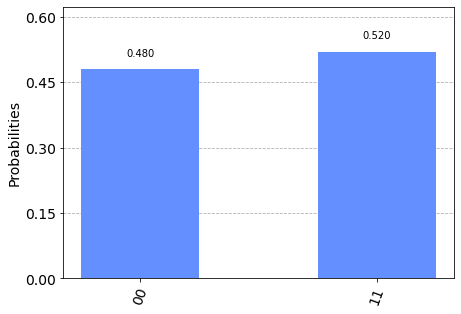

In [34]:
# nice plot of the counts
counts = get_counts(circuit)
plot_histogram(counts)

In [35]:
counts = get_counts(circuit)
assert abs(counts['00']/100-.5) < 0.1
assert abs(counts['11']/100-.5) < 0.1
assert sum(counts.values()) == 100

Notice that we only observe 00 and 11 as outcomes, even though we made measurements on two spatially separated qubits. If one measurement gives a value, the other one always give the same. 

# Mixed states

**Exercise 6** (1 point). The density matrix formalism is critical in understanding noise models and decoherence, so it is indispensible to start working with current and near-future quantum computers. Many simulator backends provide noise models, but it is out of scope for this course to develop a deep understanding of it.

Instead, let's use the wavefunction simulator to create the (maximally) entangled state $|\phi^+\rangle$. The object should be called circuit and do not include measurements. Your circuit should be in an object called `circuit`.

In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
amplitudes = get_amplitudes(circuit)
assert np.allclose(np.array([np.sqrt(2)/2, 0, 0, np.sqrt(2)/2]), amplitudes)

**Exercise 7** (1 point). Create the density matrix called `dm` of the probability amplitudes contained in the `amplitudes` array. Recall that you need a ket and a bra in this order to produce it, but the shape of the `amplitudes` array is incorrect for transposition. Reshape it first

In [ ]:
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Taking the partial trace of a density matrix is the equivalent of taking the marginal of a joint probability distribution along one random variable. If we take the partial trace of this density matrix in any of the qubit subsystems, we are going to get the maximally mixed state, that is, the uniform distribution over the remaining system. This reflects the strong correlation between the two subsystems: if we marginalize over one, we have no predictive power over the other one. We exploit this property when we create protocols for preparing thermal states.